# Transfer studies

In [14]:
from pathlib import Path

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors

import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("pdf", "svg")

from pipoli.core import Dimension

In [15]:
DATA = Path() / "output" / "data" / "data-naive-similar-'m'-'L'-'g'-geom-(0.1, 10)-(0.1, 10)-(1, 1)-50-50-1.pkl.gz"

In [16]:
all_data = pd.read_pickle(DATA)

In [17]:
BASE = all_data.attrs["base"]
all_data.attrs

{'base': ['m', 'L', 'g'],
 'space': 'geom',
 'range_1': (0.1, 10),
 'range_2': (0.1, 10),
 'range_3': (1, 1),
 'num_1': 50,
 'num_2': 50,
 'num_3': 1,
 'nb_eval_episodes': 10,
 'observations_shape': '(nb_episodes, nb_steps, 17)',
 'actions_shape': '(nb_episodes, nb_steps, 6)',
 'rewards_shape': '(nb_episodes, nb_steps)',
 'infos_shape': '(nb_episodes, nb_steps)',
 'policy_info': {'repo_id': 'farama-minari/HalfCheetah-v5-TQC-expert',
  'filename': 'halfcheetah-v5-TQC-expert.zip',
  'commit': '995505a'},
 'env': 'HalfCheetah-v5',
 'comment': "env has custom xml_file, forward_reward_weight and ctrl_cost_weight supplied by the context\nto make the reward function of the env dimensionally homogeneous, it is assumed that the weight's dimensions are such that [reward] = 1\nall the contexts are similar\nthe policy was not scaled (naive transfer)"}

## Similar transfer study

### Data processing

In [18]:
BASE_DIMENSIONS = [
    M := Dimension([1, 0, 0]),
    L := Dimension([0, 1, 0]),
    T := Dimension([0, 0, 1]),
]
Unit = Dimension([0, 0, 0])

In [19]:
process_df = all_data[["context", "b1", "b2", "b3", "infos"]].sort_values(["b1", "b2", "b3"])

In [20]:
process_df

context  \
cheetah-m-L-g_1.400e+00_5.000e-02_9.810e+00  Context([Dimension([1 0 0]), Dimension([0 1 0]...   
cheetah-m-L-g_1.400e+00_5.493e-02_9.810e+00  Context([Dimension([1 0 0]), Dimension([0 1 0]...   
cheetah-m-L-g_1.400e+00_6.034e-02_9.810e+00  Context([Dimension([1 0 0]), Dimension([0 1 0]...   
cheetah-m-L-g_1.400e+00_6.629e-02_9.810e+00  Context([Dimension([1 0 0]), Dimension([0 1 0]...   
cheetah-m-L-g_1.400e+00_7.282e-02_9.810e+00  Context([Dimension([1 0 0]), Dimension([0 1 0]...   
...                                                                                        ...   
cheetah-m-L-g_1.400e+02_3.433e+00_9.810e+00  Context([Dimension([1 0 0]), Dimension([0 1 0]...   
cheetah-m-L-g_1.400e+02_3.772e+00_9.810e+00  Context([Dimension([1 0 0]), Dimension([0 1 0]...   
cheetah-m-L-g_1.400e+02_4.143e+00_9.810e+00  Context([Dimension([1 0 0]), Dimension([0 1 0]...   
cheetah-m-L-g_1.400e+02_4.551e+00_9.810e+00  Context([Dimension([1 0 0]), Dimension([0 1 0]...   
cheetah-m-L-g_1.400e+02_5.000e+00_9.810e+00  Context([Dimension([1 0 0]), Dimension([0 1 0]...   

                                                b1        b2    b3  \
cheetah-m-L-g_1.400e+00_5.000e-02_9.810e+00    1.4  0.050000  9.81   
cheetah-m-L-g_1.400e+00_5.493e-02_9.810e+00    1.4  0.054927  9.81   
cheetah-m-L-g_1.400e+00_6.034e-02_9.810e+00    1.4  0.060340  9.81   
cheetah-m-L-g_1.400e+00_6.629e-02_9.810e+00    1.4  0.066286  9.81   
cheetah-m-L-g_1.400e+00_7.282e-02_9.810e+00    1.4  0.072817  9.81   
...                                            ...       ...   ...   
cheetah-m-L-g_1.400e+02_3.433e+00_9.810e+00  140.0  3.433244  9.81   
cheetah-m-L-g_1.400e+02_3.772e+00_9.810e+00  140.0  3.771560  9.81   
cheetah-m-L-g_1.400e+02_4.143e+00_9.810e+00  140.0  4.143214  9.81   
cheetah-m-L-g_1.400e+02_4.551e+00_9.810e+00  140.0  4.551491  9.81   
cheetah-m-L-g_1.400e+02_5.000e+00_9.810e+00  140.0  5.000000  9.81   

                                                                                         infos  
cheetah-m-L-g_1.400e+00_5.000e-02_9.810e+00  [[{'x_position': -0.044912290243807045, 'x_vel...  
cheetah-m-L-g_1.400e+00_5.493e-02_9.810e+00  [[{'x_position': -0.08142084697709952, 'x_velo...  
cheetah-m-L-g_1.400e+00_6.034e-02_9.810e+00  [[{'x_position': -0.08207416197374803, 'x_velo...  
cheetah-m-L-g_1.400e+00_6.629e-02_9.810e+00  [[{'x_position': -0.01084963665492011, 'x_velo...  
cheetah-m-L-g_1.400e+00_7.282e-02_9.810e+00  [[{'x_position': 0.007151414220616885, 'x_velo...  
...                                                                                        ...  
cheetah-m-L-g_1.400e+02_3.433e+00_9.810e+00  [[{'x_position': 0.0775302464668308, 'x_veloci...  
cheetah-m-L-g_1.400e+02_3.772e+00_9.810e+00  [[{'x_position': 0.029843653723986847, 'x_velo...  
cheetah-m-L-g_1.400e+02_4.143e+00_9.810e+00  [[{'x_position': -0.04103095411291312, 'x_velo...  
cheetah-m-L-g_1.400e+02_4.551e+00_9.810e+00  [[{'x_position': 0.06998536799911406, 'x_veloc...  
cheetah-m-L-g_1.400e+02_5.000e+00_9.810e+00  [[{'x_position': 0.04434980678719665, 'x_veloc...  

[2501 rows x 5 columns]

In [21]:
original_context = process_df["context"].loc["original"]

process_df["adimensional_distance_to_original"] = process_df["context"].map(lambda c: c.adimensional_distance(original_context, BASE))
process_df["cosine_similarity_to_original"] = process_df["context"].map(lambda c: c.cosine_similarity(original_context))
process_df["rewards_forward"] = process_df["infos"].map(np.vectorize(lambda infos: infos["reward_forward"]))
process_df["rewards_ctrl"] = process_df["infos"].map(np.vectorize(lambda infos: infos["reward_ctrl"]))
process_df["totals_reward_forward"] = process_df["rewards_forward"].map(lambda r: r.sum(axis=1))
process_df["totals_reward_ctrl"] = process_df["rewards_ctrl"].map(lambda r: r.sum(axis=1))
process_df["totals_reward"] = process_df.apply(lambda row: row["totals_reward_forward"] + row["totals_reward_ctrl"], axis=1)
process_df["mean_total_reward_forward"] = process_df["totals_reward_forward"].map(np.mean)
process_df["mean_total_reward_ctrl"] = process_df["totals_reward_ctrl"].map(np.mean)
process_df["mean_total_reward"] = process_df["totals_reward"].map(np.mean)
process_df["std_total_reward_forward"] = process_df["totals_reward_forward"].map(np.std)
process_df["std_total_reward_ctrl"] = process_df["totals_reward_ctrl"].map(np.std)
process_df["std_total_reward"] = process_df["totals_reward"].map(np.std)
process_df["mean_total_reward_difference"] = process_df["mean_total_reward"] - process_df["mean_total_reward"].loc["original"]

In [22]:
process_df

context  \
cheetah-m-L-g_1.400e+00_5.000e-02_9.810e+00  Context([Dimension([1 0 0]), Dimension([0 1 0]...   
cheetah-m-L-g_1.400e+00_5.493e-02_9.810e+00  Context([Dimension([1 0 0]), Dimension([0 1 0]...   
cheetah-m-L-g_1.400e+00_6.034e-02_9.810e+00  Context([Dimension([1 0 0]), Dimension([0 1 0]...   
cheetah-m-L-g_1.400e+00_6.629e-02_9.810e+00  Context([Dimension([1 0 0]), Dimension([0 1 0]...   
cheetah-m-L-g_1.400e+00_7.282e-02_9.810e+00  Context([Dimension([1 0 0]), Dimension([0 1 0]...   
...                                                                                        ...   
cheetah-m-L-g_1.400e+02_3.433e+00_9.810e+00  Context([Dimension([1 0 0]), Dimension([0 1 0]...   
cheetah-m-L-g_1.400e+02_3.772e+00_9.810e+00  Context([Dimension([1 0 0]), Dimension([0 1 0]...   
cheetah-m-L-g_1.400e+02_4.143e+00_9.810e+00  Context([Dimension([1 0 0]), Dimension([0 1 0]...   
cheetah-m-L-g_1.400e+02_4.551e+00_9.810e+00  Context([Dimension([1 0 0]), Dimension([0 1 0]...   
cheetah-m-L-g_1.400e+02_5.000e+00_9.810e+00  Context([Dimension([1 0 0]), Dimension([0 1 0]...   

                                                b1        b2    b3  \
cheetah-m-L-g_1.400e+00_5.000e-02_9.810e+00    1.4  0.050000  9.81   
cheetah-m-L-g_1.400e+00_5.493e-02_9.810e+00    1.4  0.054927  9.81   
cheetah-m-L-g_1.400e+00_6.034e-02_9.810e+00    1.4  0.060340  9.81   
cheetah-m-L-g_1.400e+00_6.629e-02_9.810e+00    1.4  0.066286  9.81   
cheetah-m-L-g_1.400e+00_7.282e-02_9.810e+00    1.4  0.072817  9.81   
...                                            ...       ...   ...   
cheetah-m-L-g_1.400e+02_3.433e+00_9.810e+00  140.0  3.433244  9.81   
cheetah-m-L-g_1.400e+02_3.772e+00_9.810e+00  140.0  3.771560  9.81   
cheetah-m-L-g_1.400e+02_4.143e+00_9.810e+00  140.0  4.143214  9.81   
cheetah-m-L-g_1.400e+02_4.551e+00_9.810e+00  140.0  4.551491  9.81   
cheetah-m-L-g_1.400e+02_5.000e+00_9.810e+00  140.0  5.000000  9.81   

                                                                                         infos  \
cheetah-m-L-g_1.400e+00_5.000e-02_9.810e+00  [[{'x_position': -0.044912290243807045, 'x_vel...   
cheetah-m-L-g_1.400e+00_5.493e-02_9.810e+00  [[{'x_position': -0.08142084697709952, 'x_velo...   
cheetah-m-L-g_1.400e+00_6.034e-02_9.810e+00  [[{'x_position': -0.08207416197374803, 'x_velo...   
cheetah-m-L-g_1.400e+00_6.629e-02_9.810e+00  [[{'x_position': -0.01084963665492011, 'x_velo...   
cheetah-m-L-g_1.400e+00_7.282e-02_9.810e+00  [[{'x_position': 0.007151414220616885, 'x_velo...   
...                                                                                        ...   
cheetah-m-L-g_1.400e+02_3.433e+00_9.810e+00  [[{'x_position': 0.0775302464668308, 'x_veloci...   
cheetah-m-L-g_1.400e+02_3.772e+00_9.810e+00  [[{'x_position': 0.029843653723986847, 'x_velo...   
cheetah-m-L-g_1.400e+02_4.143e+00_9.810e+00  [[{'x_position': -0.04103095411291312, 'x_velo...   
cheetah-m-L-g_1.400e+02_4.551e+00_9.810e+00  [[{'x_position': 0.06998536799911406, 'x_veloc...   
cheetah-m-L-g_1.400e+02_5.000e+00_9.810e+00  [[{'x_position': 0.04434980678719665, 'x_veloc...   

                                             adimensional_distance_to_original  \
cheetah-m-L-g_1.400e+00_5.000e-02_9.810e+00                       5.684342e-14   
cheetah-m-L-g_1.400e+00_5.493e-02_9.810e+00                       8.362735e-17   
cheetah-m-L-g_1.400e+00_6.034e-02_9.810e+00                       5.684885e-14   
cheetah-m-L-g_1.400e+00_6.629e-02_9.810e+00                       1.003745e-16   
cheetah-m-L-g_1.400e+00_7.282e-02_9.810e+00                       1.345501e-16   
...                                                                        ...   
cheetah-m-L-g_1.400e+02_3.433e+00_9.810e+00                       5.684347e-14   
cheetah-m-L-g_1.400e+02_3.772e+00_9.810e+00                       5.684342e-14   
cheetah-m-L-g_1.400e+02_4.143e+00_9.810e+00                       6.286883e-16   
cheetah-m-L-g_1.400e+02_4.551e+00_9.810e+00                       5.6846

In [23]:
score_df = process_df[["b1", "b2", "b3", "adimensional_distance_to_original", "cosine_similarity_to_original", "mean_total_reward", "std_total_reward", "mean_total_reward_forward", "std_total_reward_forward", "mean_total_reward_ctrl", "std_total_reward_ctrl"]].rename(columns=dict(zip(["b1", "b2", "b3"], BASE)))

### Visualization

In [24]:
def heatmap(df, x, y, C, /, title=None, xlabel=None, ylabel=None, zlabel=None, xscale="log", yscale="log", **kwargs):
    xs = np.array(df[x])
    ys = np.array(df[y])
    Cs = np.array(df[C])

    Nx = np.sqrt(xs.size).astype(int)
    Ny = np.sqrt(ys.size).astype(int)
    X = xs.reshape((Nx, Ny))
    Y = ys.reshape((Nx, Ny))
    Z = Cs.reshape((Nx, Ny))

    plt.figure()
    plt.pcolormesh(X, Y, Z, **kwargs)
    plt.xscale(xscale)
    plt.yscale(yscale)
    plt.title(title or "")
    plt.xlabel(xlabel or x)
    plt.ylabel(ylabel or y)
    plt.colorbar(label=zlabel or C)

In [25]:
score_df

m         L     g  \
cheetah-m-L-g_1.400e+00_5.000e-02_9.810e+00    1.4  0.050000  9.81   
cheetah-m-L-g_1.400e+00_5.493e-02_9.810e+00    1.4  0.054927  9.81   
cheetah-m-L-g_1.400e+00_6.034e-02_9.810e+00    1.4  0.060340  9.81   
cheetah-m-L-g_1.400e+00_6.629e-02_9.810e+00    1.4  0.066286  9.81   
cheetah-m-L-g_1.400e+00_7.282e-02_9.810e+00    1.4  0.072817  9.81   
...                                            ...       ...   ...   
cheetah-m-L-g_1.400e+02_3.433e+00_9.810e+00  140.0  3.433244  9.81   
cheetah-m-L-g_1.400e+02_3.772e+00_9.810e+00  140.0  3.771560  9.81   
cheetah-m-L-g_1.400e+02_4.143e+00_9.810e+00  140.0  4.143214  9.81   
cheetah-m-L-g_1.400e+02_4.551e+00_9.810e+00  140.0  4.551491  9.81   
cheetah-m-L-g_1.400e+02_5.000e+00_9.810e+00  140.0  5.000000  9.81   

                                             adimensional_distance_to_original  \
cheetah-m-L-g_1.400e+00_5.000e-02_9.810e+00                       5.684342e-14   
cheetah-m-L-g_1.400e+00_5.493e-02_9.810e+00                       8.362735e-17   
cheetah-m-L-g_1.400e+00_6.034e-02_9.810e+00                       5.684885e-14   
cheetah-m-L-g_1.400e+00_6.629e-02_9.810e+00                       1.003745e-16   
cheetah-m-L-g_1.400e+00_7.282e-02_9.810e+00                       1.345501e-16   
...                                                                        ...   
cheetah-m-L-g_1.400e+02_3.433e+00_9.810e+00                       5.684347e-14   
cheetah-m-L-g_1.400e+02_3.772e+00_9.810e+00                       5.684342e-14   
cheetah-m-L-g_1.400e+02_4.143e+00_9.810e+00                       6.286883e-16   
cheetah-m-L-g_1.400e+02_4.551e+00_9.810e+00                       5.684623e-14   
cheetah-m-L-g_1.400e+02_5.000e+00_9.810e+00                       6.335423e-16   

                                             cosine_similarity_to_original  \
cheetah-m-L-g_1.400e+00_5.000e-02_9.810e+00                       0.004487   
cheetah-m-L-g_1.400e+00_5.493e-02_9.810e+00                       0.005829   
cheetah-m-L-g_1.400e+00_6.034e-02_9.810e+00                       0.007601   
cheetah-m-L-g_1.400e+00_6.629e-02_9.810e+00                       0.009940   
cheetah-m-L-g_1.400e+00_7.282e-02_9.810e+00                       0.013031   
...                                                                    ...   
cheetah-m-L-g_1.400e+02_3.433e+00_9.810e+00                       0.998417   
cheetah-m-L-g_1.400e+02_3.772e+00_9.810e+00                       0.998270   
cheetah-m-L-g_1.400e+02_4.143e+00_9.810e+00                       0.998107   
cheetah-m-L-g_1.400e+02_4.551e+00_9.810e+00                       0.997927   
cheetah-m-L-g_1.400e+02_5.000e+00_9.810e+00                       0.997727   

                                             mean_total_reward  \
cheetah-m-L-g_1.400e+00_5.000e-02_9.810e+00      -3.935634e+06   
cheetah-m-L-g_1.400e+00_5.493e-02_9.810e+00      -3.006090e+06   
cheetah-m-L-g_1.400e+00_6.034e-02_9.810e+00      -2.342453e+06   
cheetah-m-L-g_1.400e+00_6.629e-02_9.810e+00      -1.984837e+06   
cheetah-m-L-g_1.400e+00_7.282e-02_9.810e+00      -1.588918e+06   
...                                                        ...   
cheetah-m-L-g_1.400e+02_3.433e+00_9.810e+00      -5.343356e-01   
cheetah-m-L-g_1.400e+02_3.772e+00_9.810e+00      -6.441664e-01   
cheetah-m-L-g_1.400e+02_4.143e+00_9.810e+00      -2.507826e-01   
cheetah-m-L-g_1.400e+02_4.551e+00_9.810e+00      -8.233746e-02   
cheetah-m-L-g_1.400e+02_5.000e+00_9.810e+00      -7.042069e-01   

                                             std_total_reward  \
cheetah-m-L-g_1.400e+00_5.000e-02_9.810e+00     887007.798516   
cheetah-m-L-g_1.400e+00_5.493e-02_9.810e+00     473197.690544   
cheetah-m-L-g_1.400e+00_6.034e-02_9.810e+00     412603.385408   
cheetah-m-L-g_1.400e+00_6.629e-02_9.810e+00     398919.883139   
cheetah-m-L-g_1.400e+00_7.282e-02_9.810e+00     344685.048412   
...                                                       ...   
cheetah-m-L-g_1.400e+02_3.433e+00_9.81

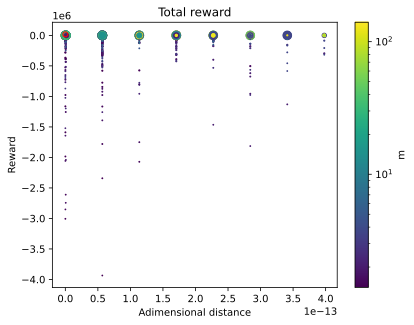

In [26]:
viz_df = score_df.sort_values(["adimensional_distance_to_original"])

viz_df.plot.scatter(
    x="adimensional_distance_to_original",
    y="mean_total_reward",
    s=viz_df["L"]*15,
    c="m",
    xlabel="Adimensional distance",
    ylabel="Reward",
    title="Total reward",
    legend=False,
    # cmap="coolwarm",
    norm="log", #colors.CenteredNorm(vcenter=original_context.value("m"))
    # logx=True,
)
plt.scatter(0, score_df.loc["original"]["mean_total_reward"], marker="o", s=25, facecolor="none", edgecolors="r")

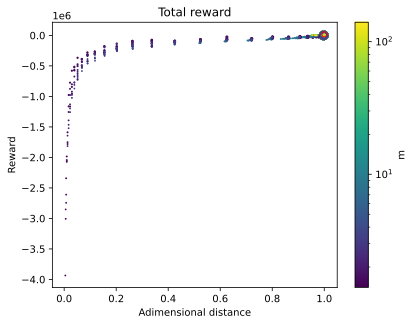

In [27]:
viz_df = score_df.sort_values(["adimensional_distance_to_original"])

viz_df.plot.scatter(
    x="cosine_similarity_to_original",
    y="mean_total_reward",
    s=viz_df["L"]*15,
    c="m",
    xlabel="Adimensional distance",
    ylabel="Reward",
    title="Total reward",
    legend=False,
    # cmap="coolwarm",
    norm="log", #colors.CenteredNorm(vcenter=original_context.value("m"))
    # logx=True,
)
plt.scatter(1, score_df.loc["original"]["mean_total_reward"], marker="o", s=25, facecolor="none", edgecolors="r")

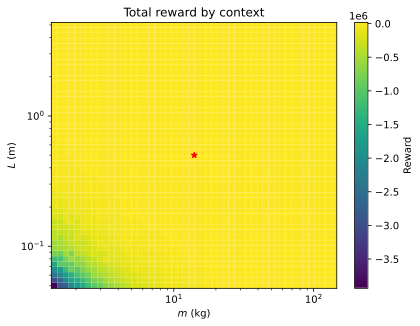

In [28]:
heatmap(
    score_df.drop("original").sort_values(["m", "L"]),
    "m",
    "L",
    "mean_total_reward",
    title="Total reward by context",
    xlabel="$m$ (kg)",
    ylabel="$L$ (m)",
    zlabel="Reward",
    # norm=colors.TwoSlopeNorm(0), #"linear",
    # cmap="coolwarm",
    # xscale="linear",
    # yscale="linear",
)
plt.scatter(original_context.value("m"), original_context.value("L"), c="r", marker="*")

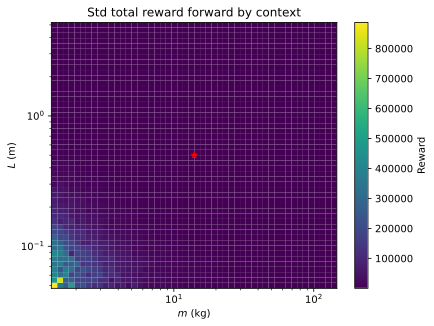

In [29]:
heatmap(
    score_df.drop("original").sort_values(["m", "L"]),
    "m",
    "L",
    "std_total_reward",
    title="Std total reward forward by context",
    xlabel="$m$ (kg)",
    ylabel="$L$ (m)",
    zlabel="Reward",
    # norm=colors.TwoSlopeNorm(0), #"linear",
    # cmap="coolwarm",
    # xscale="linear",
    # yscale="linear",
)
plt.scatter(original_context.value("m"), original_context.value("L"), c="r", marker="*")

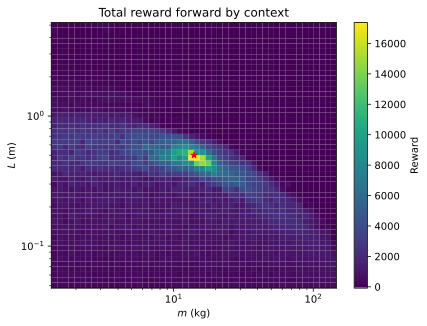

In [30]:
heatmap(
    score_df.drop("original").sort_values(["m", "L"]),
    "m",
    "L",
    "mean_total_reward_forward",
    title="Total reward forward by context",
    xlabel="$m$ (kg)",
    ylabel="$L$ (m)",
    zlabel="Reward",
    # norm=colors.TwoSlopeNorm(0), #"linear",
    # cmap="coolwarm",
    # xscale="linear",
    # yscale="linear",
)
plt.scatter(original_context.value("m"), original_context.value("L"), c="r", marker="*")

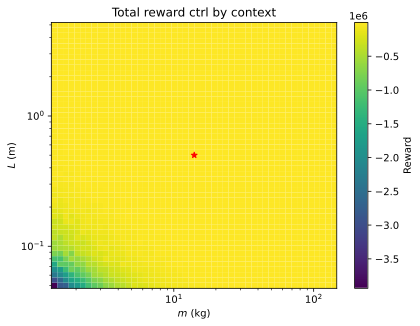

In [31]:
heatmap(
    score_df.drop("original").sort_values(["m", "L"]),
    "m",
    "L",
    "mean_total_reward_ctrl",
    title="Total reward ctrl by context",
    xlabel="$m$ (kg)",
    ylabel="$L$ (m)",
    zlabel="Reward",
    norm="linear",
    # cmap="coolwarm",
    # xscale="linear",
    # yscale="linear",
)
plt.scatter(original_context.value("m"), original_context.value("L"), c="r", marker="*")

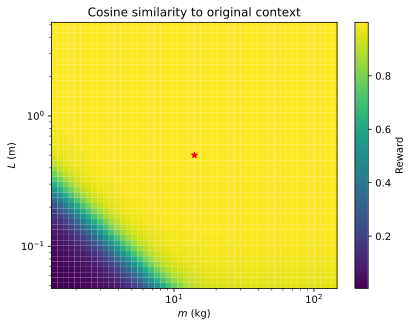

In [32]:
heatmap(
    score_df.drop("original").sort_values(["m", "L"]),
    "m",
    "L",
    "cosine_similarity_to_original",
    title="Cosine similarity to original context",
    xlabel="$m$ (kg)",
    ylabel="$L$ (m)",
    zlabel="Reward",
    norm="linear",
    # cmap="coolwarm",
    # xscale="linear",
    # yscale="linear",
)
plt.scatter(original_context.value("m"), original_context.value("L"), c="r", marker="*")

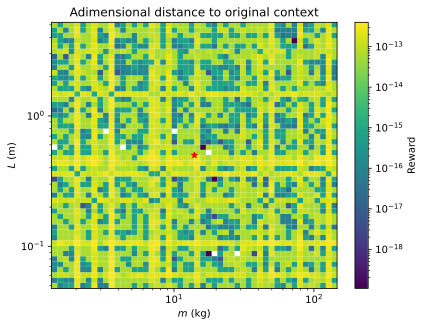

In [33]:
heatmap(
    score_df.drop("original").sort_values(["m", "L"]),
    "m",
    "L",
    "adimensional_distance_to_original",
    title="Adimensional distance to original context",
    xlabel="$m$ (kg)",
    ylabel="$L$ (m)",
    zlabel="Reward",
    norm="log",
    # cmap="coolwarm",
    # xscale="linear",
    # yscale="linear",
)
plt.scatter(original_context.value("m"), original_context.value("L"), c="r", marker="*")